# Data Exploration 04

You're working with a team of botanists to develop a flower classification system. 

Your assignment is to build a k-Nearest Neighbors model to classify flowers based on their petal and sepal sizes.

## Part A: Import and Explore the data

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv)

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values?

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns



In [2]:
url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
chart =alt.Chart(df).mark_circle().encode(
    x='petal_length',
    y='petal_width',
    color=alt.Color('species', scale=alt.Scale(scheme='set1'))
)
chart.display()


alt.Chart(...)

In [6]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions

features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = df['species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [8]:
# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
54,6.5,2.8,4.6,1.5
126,6.2,2.8,4.8,1.8
36,5.5,3.5,1.3,0.2
108,6.7,2.5,5.8,1.8


In [10]:
y_train.head()

50     Iris-versicolor
54     Iris-versicolor
126     Iris-virginica
36         Iris-setosa
108     Iris-virginica
Name: species, dtype: object

In [11]:
# Import the KNeighborsClassifier class from sklearn
# Note that it's in the neighbors submodule. See the example code in the
# documentation for details on how to import it
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Create an instance of the model, configuring it to use the 3 nearest neighbors
# store the instance in a variable
clf = KNeighborsClassifier(n_neighbors = 3)

### Step 5: Train the model

Next we'll train the model. We do this by providing it with the training data we split off from the dataset in step 3. 

The model "learns" how to associate the feature values (X) with the targets (y). The exact process it uses to learn how to do this depends on which algorithm we're using. 

Sometimes, this is called "fitting the data to the model", so in sklearn, we perform this step using the [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) method.

In [13]:
# Call the "fit" method of the classifier instance we created in step 4.
# Pass it the X_train and y_train data so that it can learn to make predictions
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 6: Make Predictions on Test Data

We'll give the measurements of each flower to the model and have it predict their species. We'll then compare those predictions to the known values to determine how accurate our model is.

Since this is a classification model, there are two different methods we can use to make predictions:

- [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict), which returns the most likely prediction for each sample.

- [predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba) which returns a list of probabilities for each sample. The probabilities tell us how confident the model is that the corresponding sample belongs to a particular class.

In [14]:
# Use the predict() method to get a list of predictions for the samples in our 
# test data. Then output those predictions
test_predictions = clf.predict(X_test)
test_predictions

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [15]:
# Just a quick comparison with y_test to see if they match up
y_test

4          Iris-setosa
136     Iris-virginica
1          Iris-setosa
131     Iris-virginica
32         Iris-setosa
101     Iris-virginica
106     Iris-virginica
67     Iris-versicolor
10         Iris-setosa
12         Iris-setosa
95     Iris-versicolor
59     Iris-versicolor
78     Iris-versicolor
52     Iris-versicolor
119     Iris-virginica
6          Iris-setosa
99     Iris-versicolor
141     Iris-virginica
144     Iris-virginica
39         Iris-setosa
97     Iris-versicolor
63     Iris-versicolor
105     Iris-virginica
112     Iris-virginica
127     Iris-virginica
42         Iris-setosa
75     Iris-versicolor
149     Iris-virginica
40         Iris-setosa
8          Iris-setosa
Name: species, dtype: object

### Step 7: Evaluate the Model

There are several metrics we can use to determine how well our model is performing.

Most of them are in the [sklearn.metrics library](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).

Most of the sklearn metric function work using the same pattern. We import the function, then give it a list of the true values for our test data, and a list of the values the model predicted for our test data. The metric then outputs the value. How we interpret that value will depend on the exact problem we're solving, the qualities of our data, and the particular metric we're using.

#### Accuracy 
Since this is a multiclass classification problem ("multiclass" means we have more than two options we're choosing from), we can get a quick estimate from the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function, which tells us the percent of correct predictions made by the model.

In [16]:
# Import the accuracy_score function and use it to determine
# how accurate the models predictions were for our test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.9333333333333333

#### Confusion Matrix
While the accuracy score tells us a little about the model's performance, it doesn't tell us much.

For example, we know how often the model was correct, but we don't know when it was wrong or why.

We can get this information from the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) function.

In [17]:
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  9]])

#### Confusion Matrix Plot

It's easier to see the results of the confusion matrix if we plot the results. The easiest way to do this is with the [plot_confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) function. 

This function works a little bit differently than the others. It takes as parameters your model instance, and the X_test and y_test data frames, and outputs a confusion matrix showing how well the model did in predicting the target values. 

You'll notice that in many cases (including this one), the numbers in the confusion matrix will be the same as the results you see from the confusion_matrix() function above, but the plot makes it easier to interpret the results.

When using the confusion matrix, you may find that the default color mapping is difficult to read. The "Blues" mapping is a popular choice.

/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


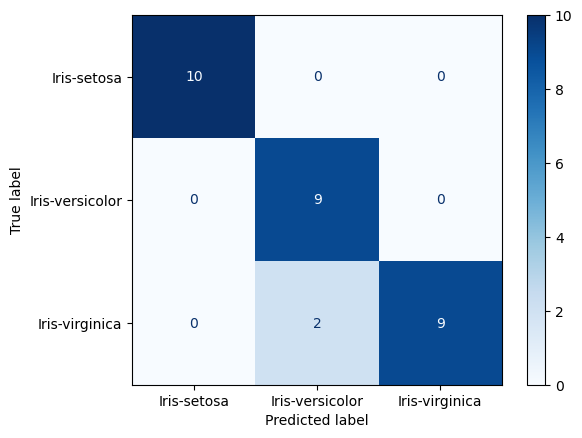

In [18]:
# Import the plot_confusion_matrix function and use it to plot the confusion
# matrix for the test data.
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

A confusion matrix is a table that is used to define the performance of a classification algorithm. It is mostly used in the field of machine learning and pattern recognition. It helps visualize the performance of an algorithm, allowing you to see true positives, true negatives, false positives, and false negatives in one place. The matrix allows you to calculate a variety of metrics, such as accuracy, precision, recall, and F1 score.

A confusion matrix typically has four main values: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These values are arranged in a specific way in the matrix to make it easy to read and interpret.

The top-left corner of the matrix represents true positives (TP), which are the number of times the model correctly predicted the positive class.
The top-right corner of the matrix represents false positives (FP), which are the number of times the model incorrectly predicted the positive class.
The bottom-left corner of the matrix represents false negatives (FN), which are the number of times the model incorrectly predicted the negative class.
The bottom-right corner of the matrix represents true negatives (TN), which are the number of times the model correctly predicted the negative class.
To read the data of a confusion matrix, you can use these values to calculate different metrics such as accuracy, precision, recall, F1 score and you can use them to evaluate the performance of your model.

For example, accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1-score = 2 * (Precision * Recall) / (Precision + Recall)

It's important to note that the interpretation of the matrix will depend on the problem you are trying to solve and the threshold you have chosen for the classifier.